--------------------------------------------
# Estimation of the experimental probability of the occurrence of 3 large-magnitude earthquakes on the same date of the year in Mexico #
--------------------------------------------


## Problem statement ##

Mexico is a country where many earthquakes occur, and some of them have caused catastrophic damage and many deaths. On September 19, 1985, an earthquake of great magnitude occurred (in Mexico City) that caused terrible damage and many deaths, leaving the date marked in the memory of Mexicans. So much so, that this date was chosen to carry out an annual prevention exercise (simulation) in the event of a major earthquake.

Since then, two more large earthquakes have occurred on the same date: September 19, 2017 (Mexico City) and September 19, 2022 (Michoacán).

¿What are the chances of this event?

## Objective ##

The objective of this exercise is to estimate the experimental probability of this coincidence and compare it with some theoretical results that are handled in various investigations. The idea is to verify informally if the theory effectively approaches what happens in reality.

## Theoretical probability vs. experimental probability ##

Theoretical probability is based on mathematical reasoning and represents the expectation that an event will occur.
For its part, the experimental probability is based on what really happens, that is, it is calculated considering the frequency of occurrence of a given event.


### **Importing the necessary libraries**

In [1]:
# Import the important libraries

import pandas as pd  # Library used for data manipulation and analysis

import numpy as np  # LIbrary used for working with arrays

import matplotlib.pyplot as plt  # Library for visualization

import seaborn as sns  # Library for visualization

import scipy

from scipy.stats import uniform

%matplotlib inline

import scipy.stats as stats  # This library contains a large number of probability distributions as well as a growing library of statistical functions

from datetime import datetime, date

import calendar

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset and checking the info

In [2]:
# Loading dataset
sismos = pd.read_csv('sismosMX.csv')
sismos.head()

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,20/01/1900,0:33:30,7.4,20.00,-105.00,33,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",20/01/1900,6:33:30,revisado
1,16/05/1900,14:12:00,6.9,20.00,-105.00,33,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",16/05/1900,20:12:00,revisado
2,05/03/1901,4:45:00,6.9,25.00,-110.00,33,"100 km al NORESTE de LA PAZ, BCS",05/03/1901,10:45:00,revisado
3,08/12/1901,20:17:00,7.0,26.00,-110.00,33,"83 km al OESTE de AHOME, SIN",09/12/1901,2:17:00,revisado
4,16/01/1902,17:19:00,7.0,17.62,-99.72,33,"21 km al OESTE de ZUMPANGO DEL RIO, GRO",16/01/1902,23:19:00,revisado


In [3]:
sismos.tail()

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
41225,21/09/2022,6:52:21,4.2,17.86,-103.08,11,"82 km al OESTE de LA MIRA, MICH",21/09/2022,11:52:21,verificado
41226,21/09/2022,10:20:02,4.0,18.56,-103.57,13,"50 km al SUROESTE de COALCOMAN, MICH",21/09/2022,15:20:02,verificado
41227,21/09/2022,10:59:23,4.0,18.21,-103.42,12,"68 km al SUROESTE de COALCOMAN, MICH",21/09/2022,15:59:23,verificado
41228,21/09/2022,13:47:35,4.0,17.95,-103.36,8,"94 km al SUR de COALCOMAN, MICH",21/09/2022,18:47:35,verificado
41229,21/09/2022,14:17:17,4.2,18.66,-103.41,11,"29 km al SUROESTE de COALCOMAN, MICH",21/09/2022,19:17:17,verificado


In [4]:
sismos.shape

(41230, 10)

In [5]:
sismos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41230 entries, 0 to 41229
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fecha                       41230 non-null  object 
 1   Hora                        41230 non-null  object 
 2   Magnitud                    41230 non-null  float64
 3   Latitud                     41230 non-null  float64
 4   Longitud                    41230 non-null  float64
 5   Profundidad                 41230 non-null  object 
 6   Referencia de localizacion  41230 non-null  object 
 7   Fecha UTC                   41230 non-null  object 
 8   Hora UTC                    41230 non-null  object 
 9   Estatus                     41230 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


### Observations:

* There are a total of 10 columns and 41,230 observations in the dataset.
* There are no missing values.
* 7 columns are object type and 3 are float type. Column "Profundidad" (depth) is categorical.
* The first earthquake registered in the database is from 20/01/1900.
* The last earthquake registered in the database is from 21/09/2022.
* The first two columns are the local time and date and could be dropped. We are going to work with the UTC worldwide format. 
* The Status and Referencia columns could be dropped.

In [6]:
# Dropping unnecessary columns
sismos1 = sismos.drop(['Fecha', 'Hora', 'Referencia de localizacion', 'Estatus'], axis=1)
sismos1

,Magnitud,Latitud,Longitud,Profundidad,Fecha UTC,Hora UTC
0,7.4,20.00,-105.00,33,20/01/1900,6:33:30
1,6.9,20.00,-105.00,33,16/05/1900,20:12:00
2,6.9,25.00,-110.00,33,05/03/1901,10:45:00
3,7.0,26.00,-110.00,33,09/12/1901,2:17:00
4,7.0,17.62,-99.72,33,16/01/1902,23:19:00
...,...,...,...,...,...,...
41225,4.2,17.86,-103.08,11,21/09/2022,11:52:21
41226,4.0,18.56,-103.57,13,21/09/2022,15:20:02
41227,4.0,18.21,-103.42,12,21/09/2022,15:59:23
41228,4.0,17.95,-103.36,8,21/09/2022,18:47:35


### Converting object data type to a float64 (column "profundidad")

The column 'Profundidad' should be numerical but instead is categorical. It's necessary to find out why.
Due to the fact the dataset only has earthquakes with depth lower than 400km and one decimal digit, any string with a length longer than 5 should be an anomaly.

In [7]:
# Looking for strings longer than 5 characters.
s = list()
for item in sismos1.Profundidad:
    if len(item) > 5:
        s.append(item)
s

['en revision', 'en revision']

In [8]:
# Identifying which rows have the text 'en revision' instead of a numerical value.
s = sismos1.query("Profundidad == 'en revision'")
s

,Magnitud,Latitud,Longitud,Profundidad,Fecha UTC,Hora UTC
17472,4.2,13.5565,-92.1658,en revision,29/06/2012,16:40:01
20285,4.0,13.6932,-92.9562,en revision,15/03/2015,16:57:37


**Observations:**
* There are only 2 rows with no useful data in the column "Profundidad" (depth).
* These earthquakes have a low magnitud (4.0 and 4.2). They could be dropped.

In [9]:
# Dropping rows
sismos2 = sismos1.query("Profundidad != 'en revision'")

In [10]:
# Converting column "Profundidad" to a float type
sismos2["Profundidad"] = sismos2.Profundidad.astype(float)

In [11]:
sismos2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41228 entries, 0 to 41229
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Magnitud     41228 non-null  float64
 1   Latitud      41228 non-null  float64
 2   Longitud     41228 non-null  float64
 3   Profundidad  41228 non-null  float64
 4   Fecha UTC    41228 non-null  object 
 5   Hora UTC     41228 non-null  object 
dtypes: float64(4), object(2)
memory usage: 2.2+ MB


## Summary statistics for numerical columns

In [12]:
# num_cols contain numerical varibales 
num_cols = ['Magnitud', 'Latitud', 'Longitud', 'Profundidad']

# Printing descriptive statistics of numerical columns
sismos2[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Magnitud,41228.0,4.238571,0.365120,4.000,4.00,4.10000,4.30,8.2000
Latitud,41228.0,17.045397,3.608507,10.271,15.27,16.09575,17.27,33.2658
Longitud,41228.0,-97.612023,5.476079,-120.595,-99.83,-95.22730,-94.09,-85.5467
Profundidad,41228.0,39.884743,43.574571,1.000,11.60,19.00000,55.80,338.0000


**Observations:**
* The mean magnitude of earthquakes in Mexico is 4.24.
* 75% of earthquakes are 4.3 of magnitude or less.
* The mean depth of earthquakes in Mexico is 39.9km: shallow earthquakes which are the most destructives. 
* 75% of earthquakes are ~56km depth or less (shallow).
* There are values really large for magnitude (8.2) and depth (338km).

## Analizying Magnitud (magnitude) and Profundidad (depth) data and checking outliers

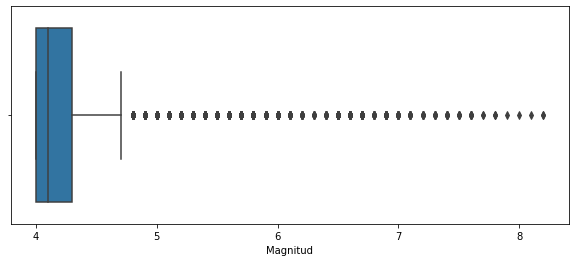

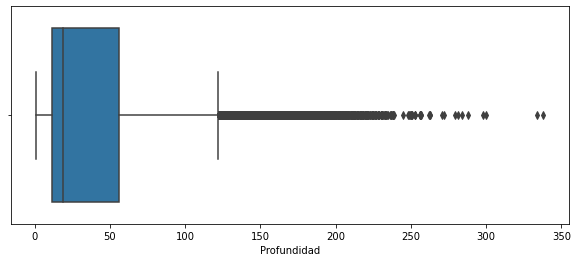

In [13]:
# Plotting boxplot for Magnitud, Profundidad

cols = ['Magnitud', 'Profundidad']

for i in cols:
    plt.figure(figsize = (10, 4))
    sns.boxplot(x = sismos2[i])
    plt.show()

**Observations:**
* There are many outliers to the right for both features.
* Both features are skewed to the right.
* Majority of outliers are smaller than 250kms depth.

**Let's find the value at upper whiskers to check how many observations are marked as outliers.**

In [14]:
# Calculating the upper whisker for the Magnitud and Profundidad variables

Q1 = sismos2.quantile(q = 0.25) # First quartile
Q3 = sismos2.quantile(q = 0.75) # Third quartile
IQR = Q3 - Q1              # Inter Quartile Range

upper_whisker_M = (Q3 + 1.5 * IQR)['Magnitud']   # Magnitud Upper Whisker
upper_whisker_P = (Q3 + 1.5 * IQR)['Profundidad']  # Profundidad Upper Whisker

print('The upper whisker for Magnitud is', upper_whisker_M)
print('The upper whisker for Profundidad is', upper_whisker_P , 'kms')

The upper whisker for Magnitud is 4.75
The upper whisker for Profundidad is 122.1 kms


In [15]:
# Checking the earthquakes marked as outliers for feature Magnitud
sismos2[sismos2.Magnitud > upper_whisker_M]

,Magnitud,Latitud,Longitud,Profundidad,Fecha UTC,Hora UTC
0,7.4,20.00,-105.00,33.0,20/01/1900,6:33:30
1,6.9,20.00,-105.00,33.0,16/05/1900,20:12:00
2,6.9,25.00,-110.00,33.0,05/03/1901,10:45:00
3,7.0,26.00,-110.00,33.0,09/12/1901,2:17:00
4,7.0,17.62,-99.72,33.0,16/01/1902,23:19:00
...,...,...,...,...,...,...
41187,7.7,18.22,-103.29,15.0,19/09/2022,18:05:09
41189,5.3,18.45,-103.88,6.0,19/09/2022,19:30:42
41200,5.8,18.27,-103.74,13.0,20/09/2022,8:17:13
41201,4.8,17.98,-103.21,12.0,20/09/2022,10:43:18


In [16]:
# Calculating percentage of outliers for Magnitud
print(round((2964/41228)*100,1), '% of earthquakes are outliers (> 4.75)')

7.2 % of earthquakes are outliers (> 4.75)


**Let's compare the summary statistics for these observations with observations on the other side of the upper whisker.**

In [17]:
# Checking the summary statistics for observations (Magnitud) marked as outliers
sismos2[sismos2.Magnitud > upper_whisker_M].describe().T

,count,mean,std,min,25%,50%,75%,max
Magnitud,2964.0,5.232389,0.582809,4.800,4.90,5.0000,5.30,8.2000
Latitud,2964.0,17.346942,4.251858,10.271,14.58,16.0211,18.12,33.2658
Longitud,2964.0,-98.561399,6.917060,-119.473,-102.58,-96.5780,-92.99,-86.1800
Profundidad,2964.0,37.826181,40.388967,1.000,12.00,21.0000,46.00,334.0000


**Observations for Magnitud outliers:**
* The mean Magnitud for outliers is 5.2, higher than the overall mean (4.2). This behavior is logical.
* The mean Profundidad (depth) is 37.8kms, lesser than the overall mean (39.9kms) which is also logical: bigger the magnitude lesser the depth.

In [18]:
# Checking the earthquakes marked as outliers for feature Profundidad
sismos2[sismos2.Profundidad > upper_whisker_P]

,Magnitud,Latitud,Longitud,Profundidad,Fecha UTC,Hora UTC
29,7.2,17.00,-92.00,150.0,30/03/1914,0:41:18
32,7.0,17.50,-95.00,150.0,02/06/1916,13:59:24
88,6.7,15.00,-91.25,200.0,27/10/1945,11:24:41
90,6.9,17.00,-94.50,130.0,11/07/1946,4:46:42
107,6.9,15.50,-92.50,200.0,26/09/1955,8:28:20
...,...,...,...,...,...,...
41144,4.3,17.86,-94.72,159.0,13/09/2022,11:16:19
41157,4.2,17.32,-94.70,139.0,15/09/2022,21:03:24
41169,4.2,15.36,-92.45,166.0,17/09/2022,7:54:40
41183,4.1,16.84,-93.87,162.0,19/09/2022,12:49:59


In [19]:
# Calculating percentage of outliers for Profunidad
print(round((3110/41228)*100,1), '% of earthquakes are outliers (> 122.1kms)')

7.5 % of earthquakes are outliers (> 122.1kms)


**Let's compare the summary statistics for these observations with observations on the other side of the upper whisker.**

In [20]:
# Checking the summary statistics for observations (profundidad) marked as outliers
sismos2[sismos2.Profundidad > upper_whisker_P].describe().T

,count,mean,std,min,25%,50%,75%,max
Magnitud,3110.0,4.192990,0.296873,4.00,4.0000,4.10000,4.200000,7.20
Latitud,3110.0,16.702343,0.977868,13.01,16.2900,16.99200,17.329575,22.56
Longitud,3110.0,-94.078086,1.582205,-105.33,-94.7343,-94.26915,-93.480425,-87.59
Profundidad,3110.0,155.077910,27.240916,122.20,134.6000,148.00000,168.500000,338.00


**Observations for Profundidad outliers:**
* The mean Magnitud for outliers is 4.2, equal than the overall mean (4.2). This behavior is logical: deeper the earthquake lesser the magnitude.
* The mean Profundidad (depth) is 155.1kms, greather than the overall mean (39.9kms) which is also logical.

### **Let's check the correlation among the variables**

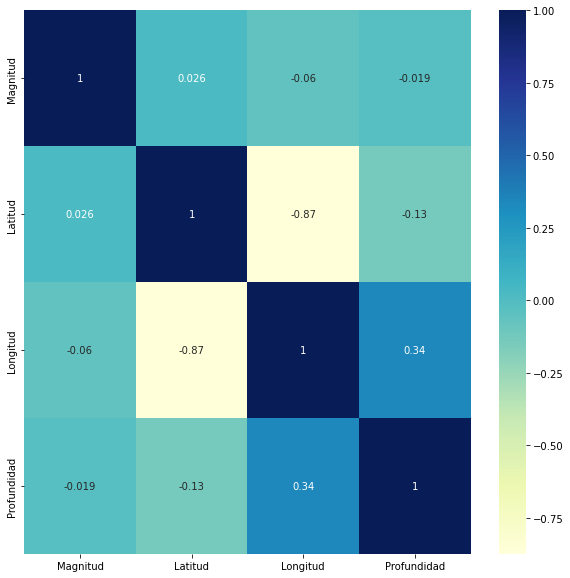

In [21]:
# Plotting the correlation map
plt.figure(figsize  = (10, 10))
sns.heatmap(sismos2.corr(), annot = True, cmap = "YlGnBu")
plt.show()

**Observations:**
* There is a strong correlation (negative) between Latitud (latitude) and Longitud (longitude): the more the south the more the west; the more the north the more the east.
* There is positive correlation between Profundidad (depth) and Longitud (longitude).

## Checking the distribution for Magnitud and Profundidad ##
To apply scipy library properly it's desirable to add an integer type column that represents the date (Fecha UTC).

To calculate the probability of the event "3 earthquakes of magnitude greater or equal to 7.0 occurring on the same date of the year", it's necessary to eliminate values less than 7.0.

In [22]:
# Adding a numerical colummn to identify dates with integers (Dia)
s = list()
for i in sismos2['Fecha UTC']:
    d = i[0:2]
    m = i[3:5]
    y = i[6:10]
    day_of_year = date(int(y), int(m), int(d)).timetuple().tm_yday
    if calendar.isleap(int(y)):
        s.append(day_of_year)
    elif not(calendar.isleap(int(y))) and day_of_year >= 60:
        s.append(day_of_year + 1)
    else:
        s.append(day_of_year)

sismos2['Dia'] = s
sismos2

,Magnitud,Latitud,Longitud,Profundidad,Fecha UTC,Hora UTC,Dia
0,7.4,20.00,-105.00,33.0,20/01/1900,6:33:30,20
1,6.9,20.00,-105.00,33.0,16/05/1900,20:12:00,137
2,6.9,25.00,-110.00,33.0,05/03/1901,10:45:00,65
3,7.0,26.00,-110.00,33.0,09/12/1901,2:17:00,344
4,7.0,17.62,-99.72,33.0,16/01/1902,23:19:00,16
...,...,...,...,...,...,...,...
41225,4.2,17.86,-103.08,11.0,21/09/2022,11:52:21,265
41226,4.0,18.56,-103.57,13.0,21/09/2022,15:20:02,265
41227,4.0,18.21,-103.42,12.0,21/09/2022,15:59:23,265
41228,4.0,17.95,-103.36,8.0,21/09/2022,18:47:35,265


In order to summarize the total amount of earthquakes per date we need to create an array. One array for all earthquakes and other for those greater to 7.0 of magnitude.

In [23]:
# Creating arrays that summarizes earthquakes per each day of the year.
# Arrays size is 366 because we need to keep track of every day including feb 29 (day 60).
sum_days_year_all = np.zeros(366)
sum_days_year_mag7 = np.zeros(366)

In [24]:
# Summarizing earthquakes of all magnitudes per day of the year
for s in sismos2.Dia:   
    sum_days_year_all[s-1] += 1 

print(sum_days_year_all)

[120. 105.  91.  91.  97. 106.  95. 104.  98. 108. 113. 131. 102. 107.
 117. 109. 141.  98. 118. 108. 133. 111. 122. 105. 107. 134. 134. 104.
 103. 102. 106. 128. 131. 104. 135. 105. 119. 102.  96. 124. 105. 110.
 103. 103. 118.  80. 101. 129.  89. 119. 123. 108. 108. 108. 108. 171.
 147. 123. 130.  32.  95. 125. 102. 106. 119.  91. 111.  91.  93. 114.
  98. 124. 121. 124. 101.  91.  99. 101.  98. 131. 124. 145.  99. 125.
 127. 110. 105. 130. 113. 102. 109. 146.  97. 107. 110. 135. 132. 132.
 108. 100.  94. 114. 107. 148. 100. 112. 109. 102. 144. 110. 110. 105.
 119. 134. 115. 117. 100. 112. 105. 107.  88. 108. 109. 106.  95. 106.
 101. 114. 133. 117. 102. 106. 110.  99. 104. 117.  96.  79.  86.  89.
  98.  92. 104. 100. 103. 105.  90. 101. 104. 123. 138. 111. 102. 114.
 101. 102.  99. 104. 115.  98. 106. 112. 136.  99.  96. 122. 117. 103.
  83. 113. 111. 129. 106. 112. 127. 143. 135. 114. 110.  94. 101. 101.
 118.  84.  95. 113. 105. 107.  92.  97.  86.  96. 113. 111. 100.  89.
  91. 

In [25]:
# Defining function to convert number of the year into day format
def get_date(day_num):
    date_format = datetime.strptime('2004' + "-" + str(day_num), "%Y-%j").strftime("%Y-%m-%d")
    return(str(date_format))

In [26]:
# Checking the mean, max and min numbers of all earthquakes per date
maximum = get_date(np.where(sum_days_year_all == sum_days_year_all.max())[0][0])
minimum = get_date(np.where(sum_days_year_all == sum_days_year_all.min())[0][0])
print('The average number of earthquakes in one date is', round(sum_days_year_all.mean(), 0))
print('The maximum number of earthquakes in one date is', round(sum_days_year_all.max(), 0), 'and the date is', maximum[-5:])
print('The minimum number of earthquakes in one date is', round(sum_days_year_all.min(), 0), 'and the dates is', minimum[-5:])

The average number of earthquakes in one date is 113.0
The maximum number of earthquakes in one date is 268.0 and the date is 09-07
The minimum number of earthquakes in one date is 32.0 and the dates is 02-28


In [27]:
# Dropping values of Magnitud less than 7
sismos7 = sismos2.query("Magnitud >= 7.0")
sismos7

,Magnitud,Latitud,Longitud,Profundidad,Fecha UTC,Hora UTC,Dia
0,7.4,20.0000,-105.0000,33.0,20/01/1900,6:33:30,20
3,7.0,26.0000,-110.0000,33.0,09/12/1901,2:17:00,344
4,7.0,17.6200,-99.7200,33.0,16/01/1902,23:19:00,16
5,7.5,14.9000,-91.5000,25.0,19/04/1902,2:23:00,110
6,7.7,16.5000,-92.5000,25.0,23/09/1902,20:18:00,267
...,...,...,...,...,...,...,...
25355,7.1,18.3297,-98.6712,51.2,19/09/2017,18:14:39,263
28050,7.2,16.2180,-98.0135,16.0,16/02/2018,23:39:39,47
35330,7.4,15.8033,-96.1337,22.8,23/06/2020,15:29:03,175
38685,7.1,16.7553,-99.9533,15.0,08/09/2021,1:47:46,252


In [28]:
# Summary for earthquakes greater or equal to 7.0 magnitude
sismos7.describe().T

,count,mean,std,min,25%,50%,75%,max
Magnitud,87.0,7.321839,0.299000,7.000,7.100,7.300,7.50000,8.2
Latitud,87.0,18.084420,4.166108,13.346,16.117,17.000,18.33485,32.7
Longitud,87.0,-99.668393,6.530041,-115.500,-102.800,-98.667,-95.43850,-89.0
Profundidad,87.0,39.114943,29.582433,9.000,22.900,33.000,37.00000,160.0
Dia,87.0,196.356322,109.170656,6.000,106.000,210.000,286.50000,366.0


**Observations:**
* Thera are 87 earthquakes greater o equal than 7.0
* The mean of magnitude for these events is high: 7.3.
* The depth for these events is the same as the overall mean: ~39km (shallow).

In [29]:
# Earthquakes occurred on Sept 19.
s = sismos7.query("Dia == 263")
s

,Magnitud,Latitud,Longitud,Profundidad,Fecha UTC,Hora UTC,Dia
1614,8.1,18.4190,-102.4680,15.0,19/09/1985,13:17:49,263
25355,7.1,18.3297,-98.6712,51.2,19/09/2017,18:14:39,263
41187,7.7,18.2200,-103.2900,15.0,19/09/2022,18:05:09,263


In [30]:
# Summarizing earthquakes of magnitude 7.0 or greater per date of the year
for s in sismos7.Dia:   
    sum_days_year_mag7[s-1] += 1 

print(sum_days_year_mag7)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 2. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 3. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.

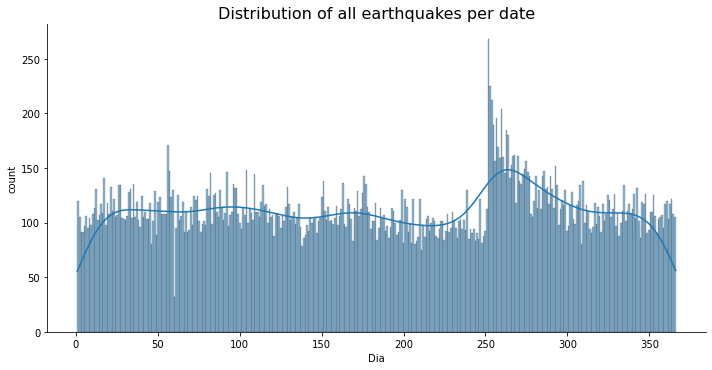

In [31]:
# Plotting distribution for all earthquakes.
sns.displot(sismos2['Dia'], kde = True, height = 5, aspect = 2, bins = 366)
plt.title('Distribution of all earthquakes per date', size = 16)
plt.ylabel('count');

Text(0.5, 1.0, 'Distribution of earthquakes of magnitude 7 o greater per date')

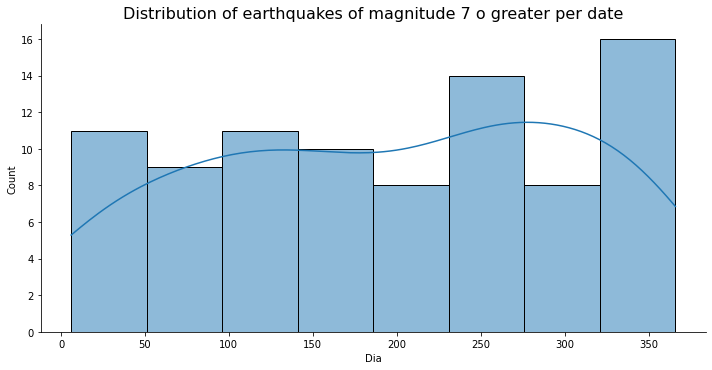

In [32]:
# Plotting distribution for magnitude 7.0 or greater.
ax = sns.displot(sismos7.Dia, kde = True, aspect = 2)
plt.title('Distribution of earthquakes of magnitude 7 o greater per date', size = 16)

**Observations:**
* In both cases, the distribution of all earthquakes and the distribution of earthquakes greater or equal to 7 are approximately uniform.
* There is a peak of earthquakes around September for the overall and the big earthquakes distributions. It shows the probability of earthquake occurrence in sept seems to be a little higher than the rest of the year. 

The experimental estimated probability of one big earthquake occurring on 19 Sept is 0.009136610670932632


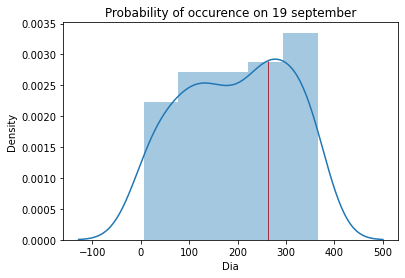

In [33]:
# Calculating P(X=3), i.e. probability that 3 earthquakes of magnitude greater or equal than 7.0 ocurre the 19 sept specifically.
ax = sns.distplot(sismos7.Dia, hist = True) 
plt.title('Probability of occurence on 19 september', size = 12)

# Value to estimate for (263 represents 19 sept)
value = 263

# Get the data from the KDE line
xdata, ydata = ax.get_lines()[0].get_data()

# The curve of the distribution obtained is an estimation from reality. It isn't the exact distribution but it's the best guest. 
# We need to find the closest x-point on the curve to 'value'.
d = (np.abs(xdata-value)).argmin()

# Find the probability using de Cumulative Density function for an interval of one (between 263 and 264).
# This is the integral of the PDF (Probability Distribution Function) found with the distplot function.
cdf = scipy.integrate.cumtrapz(ydata, xdata, initial=0)
pr = cdf[d] - cdf[d-1]
print('The experimental estimated probability of one big earthquake occurring on 19 Sept is', pr)

# Indication of the point (date) 263 on the curve
plt.fill_between(xdata,ydata, where = (xdata>=value) & (xdata<=value+1), color='r')

In [34]:
# Checking PDF is a density
print(cdf[199]) #The integral below the whole curve should be 1

# Checking the CDF is returning a correct value (using Riemann sum)
height = ydata[124] # Value of PDF in the x-point that corresponds to Sept 19
width = (xdata[199]-xdata[0])/200 # width of each rectangle under the PDF curve 
area = height*width 
print(area)

0.9998700078581151
0.009108723885121288


**Observations:**
* The area under the whole PDF curve is around 0.9999 which is a very good approximation of 1, so the PDF is a density.
* The probability (area) estimation using Riemann sum for Sept 19 is almost the same as the one calculated by the CDF, i.e., CDF is returning logical values.

In [35]:
# Calculating the experimental probability of 3 earthquakes of magnitude greater or equal than 7.0 ocurring in sept 19
pr3 = pr**3
print('The experimental estimated probability of 3 big earthquakes ocurring in Sept 19 is', pr3)

The experimental estimated probability of 3 big earthquakes ocurring in Sept 19 is 7.62702829366059e-07


In [36]:
# Calculating theoretical probability based on a uniform distribution of earthquakes

# Calculating the theoretical probability of one big earthquake on sept 19.
tp1 = 1 / 365
print('The theoretical probability of one big earthquake is', tp1)

# Calculating the theoretical probability of 3 big earthquake on sept 19.
tp3 = tp1**3
print('The theoretical probability of 3 big earthquakes is', tp3)

# Comparing the theoretical and the empirical estimated probability
r = pr3 / tp3
print('The experimental estimated probability of 3 big earthquakes is around', round(r,0), 'bigger than the theoretical probability')

The theoretical probability of one big earthquake is 0.0027397260273972603
The theoretical probability of 3 big earthquakes is 2.0564653986843763e-08
The experimental estimated probability of 3 big earthquakes is around 37.0 bigger than the theoretical probability


**Observations:**
* The experimental estimated probability of 3 big earthquakes on Sept 19 is very small: $P(X=3)=7.63e-07$.
* The theoretical probability of 3 big earthquakes on sept 19 is even smaller: $P(X=3)=2.1e-08$.
* The experimental estimated probability is 37 (one order of magnitude) bigger than the theoretical probability which is logical due to the peak of September.


## Conclusions ##
* Both probabilities (theoretical and experimental) are low but the difference between them is just one order of magnitude.
* The experimental estimated probability of 3 big earthquakes is higher than theoretical because in real life there is a peak in the earthquake count in Sept.
* In this project, the experimental probability was estimated using **KDE (Kernel Density Estimation)** which is a non-parametric method to estimate the probability density function (PDF) of a random variable based on kernels as weights. **Using different estimation methods may lead to finding different results.**